In [2]:
import numpy as np
import pandas as pd
import itertools
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from tensorflow import keras
layers = keras.layers
models = keras.models

# Pada program ini menggunakan TensorFlow v1.8
print("Anda menggunakan tensorflow versi : ", tf.__version__)

Anda menggunakan tensorflow versi :  2.15.0


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
data = pd.read_csv("/content/drive/My Drive/Klasifikasi Teks Berita BBC/bbc-text.csv")

In [10]:
data['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

## Mulai melakukan persiapan environment training dan dataset

In [11]:
train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 1780
Test size: 445


In [12]:
def train_test_split(data, train_size):
    train = data[:train_size]
    test = data[train_size:]
    return train, test

In [13]:
train_cat, test_cat = train_test_split(data['category'], train_size)
train_text, test_text = train_test_split(data['text'], train_size)

In [14]:
max_words = 1000
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words,
                                              char_level=False)

In [15]:
tokenize.fit_on_texts(train_text)
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [16]:
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [17]:
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [18]:
print('Ukuran x_train:', x_train.shape)
print('Ukuran x_test:', x_test.shape)
print('Ukuran y_train:', y_train.shape)
print('Ukuran y_test:', y_test.shape)

Ukuran x_train: (1780, 1000)
Ukuran x_test: (445, 1000)
Ukuran y_train: (1780, 5)
Ukuran y_test: (445, 5)


In [19]:
batch_size = 32
epochs = 2
drop_ratio = 0.5

## Mulai membangun model training

In [20]:
# Memulai proses build model
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(max_words,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/2
51/51 [==============================] - 1s 15ms/step - loss: 0.4434 - accuracy: 0.8702 - val_loss: 0.1717 - val_accuracy: 0.9326
Epoch 2/2
51/51 [==============================] - 0s 10ms/step - loss: 0.0457 - accuracy: 0.9931 - val_loss: 0.1305 - val_accuracy: 0.9551


## Evaluasi model

In [22]:
# Mulai melakukan tindakan evaluasi terhadap hasil akurasi yang dimiliki oleh model yang sudah dilakukan training
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

14/14 [==============================] - 0s 3ms/step - loss: 0.1225 - accuracy: 0.9663
Test loss: 0.12253139168024063
Test accuracy: 0.966292142868042


## Memulai Hyperparameter Tuning

In [23]:
def run_experiment(batch_size, epochs, drop_ratio):
  print('batch size: {}, epochs: {}, drop_ratio: {}'.format(
      batch_size, epochs, drop_ratio))
  model = models.Sequential()
  model.add(layers.Dense(512, input_shape=(max_words,)))
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(drop_ratio))
  model.add(layers.Dense(num_classes))
  model.add(layers.Activation('softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_split=0.1)
  score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=0)
  print('\tTest loss:', score[0])
  print('\tTest accuracy:', score[1])

In [24]:
batch_size = 16
epochs = 4
drop_ratio = 0.4
run_experiment(batch_size, epochs, drop_ratio)

batch size: 16, epochs: 4, drop_ratio: 0.4
	Test loss: 0.13206908106803894
	Test accuracy: 0.9550561904907227


## Melakukan Prediksi menggunakan Model


In [25]:
# Memulai melakukan prediksi hasil terhadap dataset yang ada
text_labels = encoder.classes_
for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_text.iloc[i][:50], "...")
    print('Label awal: ' + test_cat.iloc[i])
    print("Label hasil prediksi: " + predicted_label + "\n")

1/1 [==============================] - 0s 139ms/step
hobbit picture  four years away  lord of the rings ...
Label awal: entertainment
Label hasil prediksi: entertainment

1/1 [==============================] - 0s 38ms/step
game firm holds  cast  auditions video game firm b ...
Label awal: tech
Label hasil prediksi: tech

1/1 [==============================] - 0s 37ms/step
clarke plans migrant point scheme anyone planning  ...
Label awal: politics
Label hasil prediksi: politics

1/1 [==============================] - 0s 31ms/step
radcliffe will compete in london paula radcliffe w ...
Label awal: sport
Label hasil prediksi: sport

1/1 [==============================] - 0s 32ms/step
serena becomes world number two serena williams ha ...
Label awal: sport
Label hasil prediksi: sport

1/1 [==============================] - 0s 44ms/step
ultimate game  award for doom 3 sci-fi shooter doo ...
Label awal: tech
Label hasil prediksi: tech

1/1 [==============================] - 0s 32ms/step
alger

## Melakukan visualisasi pada confusion matrix

In [26]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

14/14 [==============================] - 0s 3ms/step


In [27]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Label awal : ', fontsize=25)
    plt.xlabel('Label prediksi : ', fontsize=25)

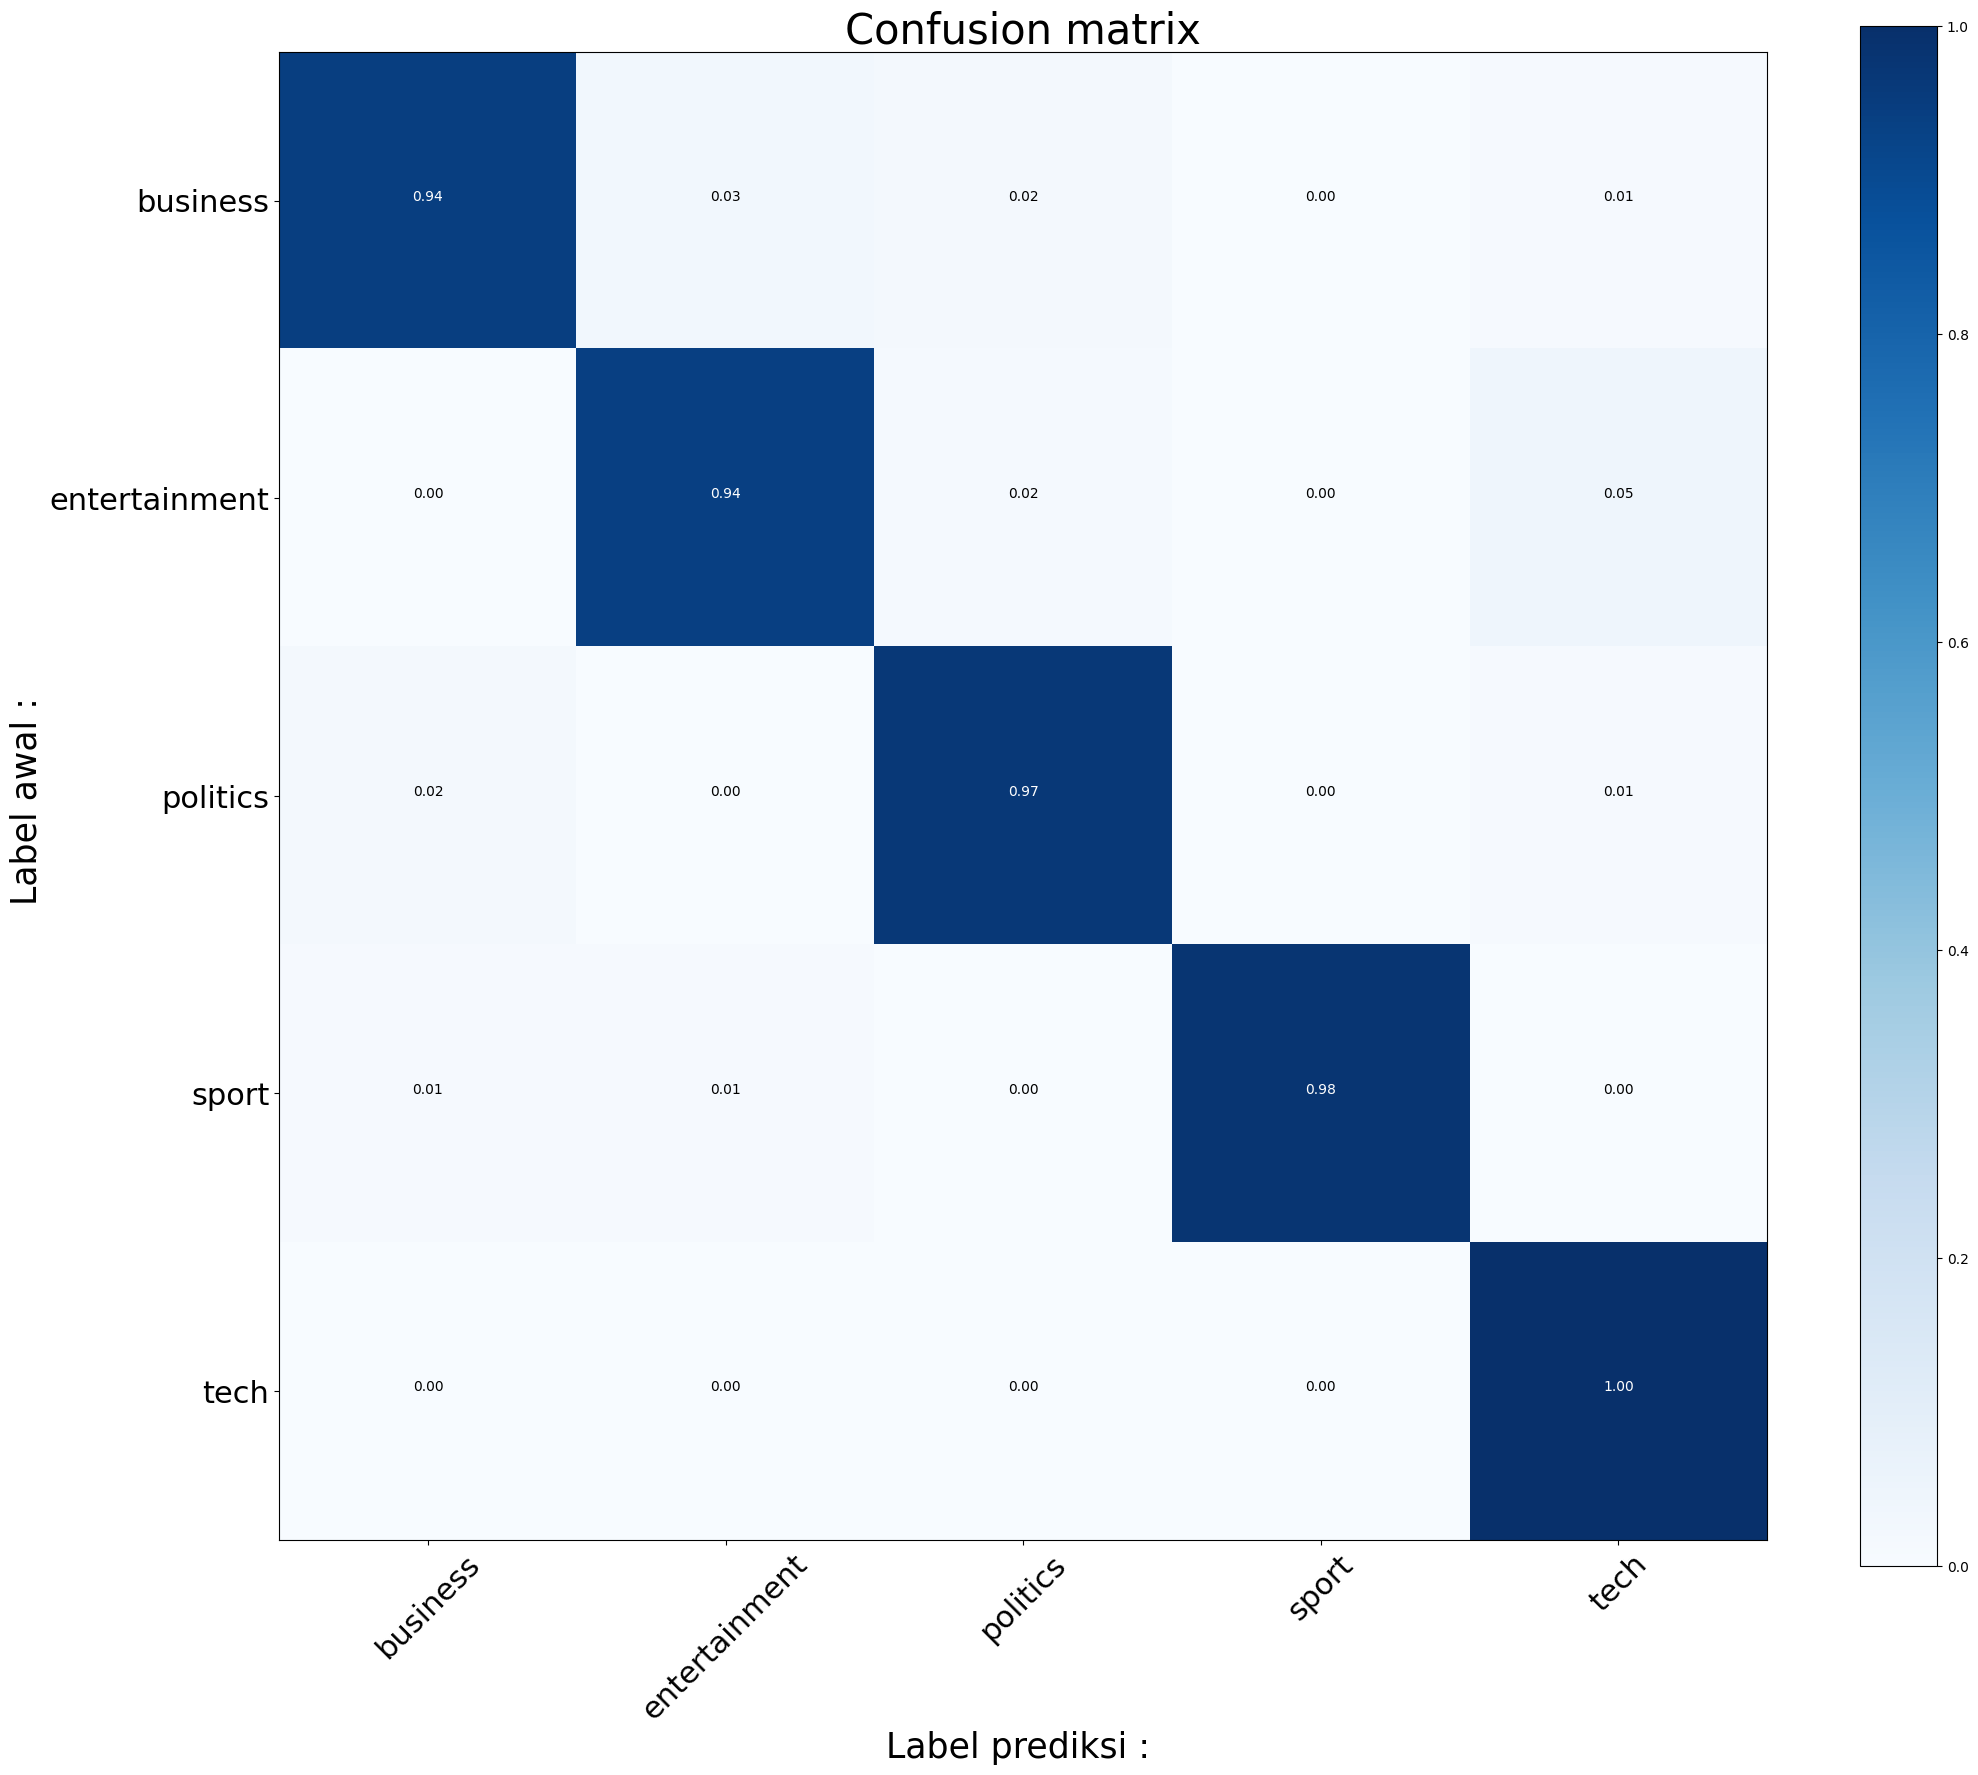

In [28]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()